<a href="https://colab.research.google.com/github/m-newhauser/data-science-in-a-day/blob/master/3-linear-regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Import functions and packages

In [ ]:
# Import functions and packages
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

## 2. Import data

In [ ]:
# Import wine data
wine_data = pd.read_csv('/content/drive/My Drive/winequality-red.csv')

## 3. Explore data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
# Preview wine data
wine_data.head(6)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5


In [ ]:
# Descriptive statistics
wine_data.describe().round(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00
mean,8.32,0.53,0.27,2.54,0.09,15.87,46.47,1.00,3.31,0.66,10.42,5.64
std,1.74,0.18,0.19,1.41,0.05,10.46,32.90,0.00,0.15,0.17,1.07,0.81
min,4.60,0.12,0.00,0.90,0.01,1.00,6.00,0.99,2.74,0.33,8.40,3.00
25%,7.10,0.39,0.09,1.90,0.07,7.00,22.00,1.00,3.21,0.55,9.50,5.00
50%,7.90,0.52,0.26,2.20,0.08,14.00,38.00,1.00,3.31,0.62,10.20,6.00
75%,9.20,0.64,0.42,2.60,0.09,21.00,62.00,1.00,3.40,0.73,11.10,6.00
max,15.90,1.58,1.00,15.50,0.61,72.00,289.00,1.00,4.01,2.00,14.90,8.00


In [ ]:
# Check correlations between features
correlations = wine_data.corr()

print(correlations)

                      fixed acidity  volatile acidity  ...   alcohol   quality
fixed acidity              1.000000         -0.256131  ... -0.061668  0.124052
volatile acidity          -0.256131          1.000000  ... -0.202288 -0.390558
citric acid                0.671703         -0.552496  ...  0.109903  0.226373
residual sugar             0.114777          0.001918  ...  0.042075  0.013732
chlorides                  0.093705          0.061298  ... -0.221141 -0.128907
free sulfur dioxide       -0.153794         -0.010504  ... -0.069408 -0.050656
total sulfur dioxide      -0.113181          0.076470  ... -0.205654 -0.185100
density                    0.668047          0.022026  ... -0.496180 -0.174919
pH                        -0.682978          0.234937  ...  0.205633 -0.057731
sulphates                  0.183006         -0.260987  ...  0.093595  0.251397
alcohol                   -0.061668         -0.202288  ...  1.000000  0.476166
quality                    0.124052         -0.39055

In [ ]:
# Pre-made function to make plotting easier
def plot_correlations(correlations):
  fig = plt.subplots(figsize=(10, 10))
  sns.heatmap(correlations,vmax=1,square=True,annot=True,cmap='Blues')

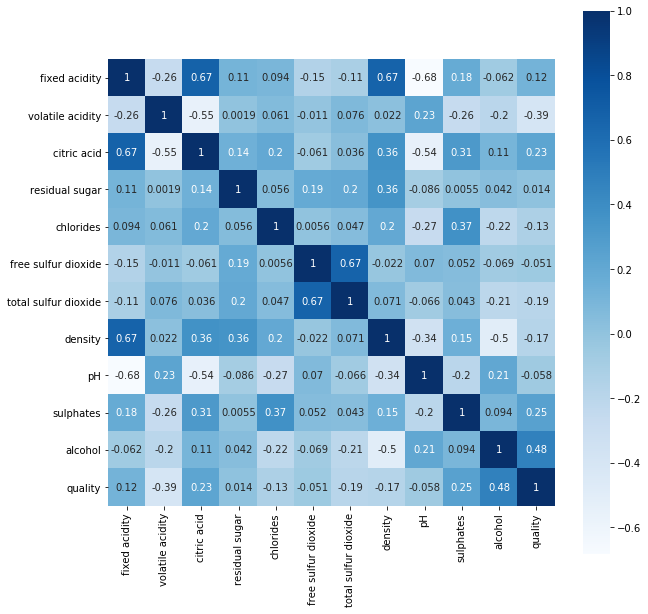

In [ ]:
# Plot correlations in color
plot_correlations(correlations)

## 4. Preprocess data

### Split variables

In [ ]:
# Let's drop residual sugar
wine_data = wine_data.drop('residual sugar', axis=1)

# Make sure it's dropped
wine_data.head()

,fixed acidity,volatile acidity,citric acid,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
# Dependent variable (what we want to PREDICT) is wine quality
y = wine_data['quality']

y

0       5
1       5
2       5
3       6
4       5
       ..
1594    5
1595    6
1596    6
1597    5
1598    6
Name: quality, Length: 1599, dtype: int64

In [ ]:
# Independent variables (FEATURES) are physicochemical tests

# Make a list of features
features = ['fixed acidity', 
            'volatile acidity', 
            'citric acid',
            'chlorides',
            'free sulfur dioxide',
            'total sulfur dioxide',
            'density',
            'pH',
            'sulphates',
            'alcohol']

# Use list to subset columns of features
x = wine_data[features]
x

,fixed acidity,volatile acidity,citric acid,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


### Split data into train and test sets

In [ ]:
# Randomly put 20% of data in the test set (80% in the train set)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=22)

## 5. Build model

In [ ]:
# Create empty model
model = LinearRegression()


# Feed data to model 
model.fit(X_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# Find intercept (b)
b = model.intercept_

# Find coefficients (m's)

coefficients = model.coef_
# View coefficients

df = pd.DataFrame(coefficients, features)
df

,0
fixed acidity,-0.005769
volatile acidity,-1.293034
citric acid,-0.251740
chlorides,-2.049152
free sulfur dioxide,0.001838
total sulfur dioxide,-0.002962
density,9.833507
pH,-0.587465
sulphates,0.979611
alcohol,0.288310


## 6. Make predictions

In [ ]:
# Look at test dataset
predictions = model.predict(X_test)


In [ ]:
# Now feed this data to the model
predictions = model.predict(X_test)

In [ ]:
# Round up predictions and add to dataframe

predictions = predictions.round()
# Make sure it's added
X_test['predictions'] = predictions 
X_test.head()


In [ ]:
# Add actual wine quality values back to dataframe
X_test['actual wine quality'] = y

# Make sure it's added
X_test.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,fixed acidity,volatile acidity,citric acid,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,actual wine quality
959,8.0,0.59,0.05,0.089,12.0,32.0,0.99735,3.36,0.61,10.0,5
1447,6.8,0.67,0.00,0.080,22.0,39.0,0.99701,3.40,0.74,9.7,5
1481,8.2,0.28,0.60,0.104,10.0,22.0,0.99828,3.39,0.68,10.6,5
1106,8.2,0.23,0.42,0.069,9.0,17.0,0.99376,3.21,0.54,12.3,6
924,8.6,0.47,0.27,0.055,14.0,28.0,0.99516,3.18,0.80,11.2,5


## 7. Evaluate model

In [ ]:
# Calculate root mean squared error
rmse = mean_squared_error(y_test, predictions)
print(rmse)

0.484375


In [ ]:
# Calculate R2
r2 = model.score(X_train, y_train)
print(r2)

0.3627330154343238


### Plot predictions and actual wine quality values

In [ ]:
# Pre-made function to make plotting easier
def plot_actual_vs_predicted(predictions, actual_values):
  m, b = np.polyfit(predictions, actual_values, 1)
  plt.title('Actual vs. Predicted Wine Quality')
  plt.ylabel('Actual Wine Quality')
  plt.xlabel('Predicted Wine Quality')
  plt.scatter(predictions, y_test,  color='blue')
  plt.plot(predictions, m*predictions + b, color='red')
  plt.show()

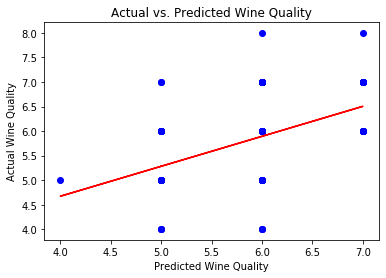

In [ ]:
# Plot predicted vs. actual wine quality on test data set
plot_actual_vs_predicted(predictions, y_test)